In [1]:
%config InlineBackend.figure_format = "svg"

import sys
sys.path.append("../")

from src.networks.dn import StateType, ActionType, ObservationType, RewardType
from src.networks.qbn import QuantumBayesianNetwork as QBN
from src.networks.bn import BayesianNetwork as BN
from src.networks.dn import SDNFactory as DN
from src.networks.nodes import DiscreteNode
import pandas as pd

# Decision Networks

## Creating the decision network structure

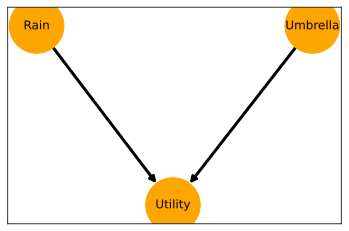

In [2]:
# Create the nodes for the network
rain = DiscreteNode("Rain", node_type=StateType, value_space=[0, 1])
umbrella = DiscreteNode("Umbrella", node_type=ActionType, value_space=[0, 1])
utility = DiscreteNode("Utility", node_type=StateType, value_space=[0, 1])

# Nodes and edges
nodes = [rain, umbrella, utility]
edges = [("Rain", "Utility"), ("Umbrella", "Utility")]

# Create classical network structure
dn = DN(BN)()
dn.add_nodes(nodes)
dn.add_edges(edges)
dn.draw()

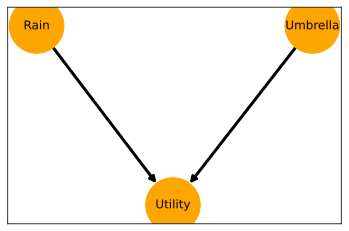

In [3]:
# Creating quantum network structure
qdn = DN(QBN)()
qdn.add_nodes(nodes)
qdn.add_edges(edges)
qdn.draw()

## Populate the Decision Network with data

In [4]:
# Add data for node Rain
data = {"Rain": [0,1], "Prob": [0.8, 0.2]}
dn.add_pt("Rain", data)
qdn.add_pt("Rain", data)

# Add data for node utility
data = {"Rain": [0,0,0,0,1,1,1,1], "Umbrella": [0,0,1,1,0,0,1,1], "Utility": [0,1,0,1,0,1,0,1], "Prob":[0,1,1,0,1,0,0,1]}
dn.add_pt("Utility", data)
qdn.add_pt("Utility", data)

# Initialize networks
dn.initialize()
qdn.initialize()

## Classical query for the best decision

In [5]:
dn.query_decision(query="Utility", evidence={"Rain": 1}, n_samples=100)

{'Umbrella': 1}

## Quantum Query for best decision

In [6]:
qdn.query_decision(query="Utility", evidence={"Rain": 1}, n_samples=100)

Sampling: 100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 262.19it/s]


{'Umbrella': 1}